In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SampleName = "N704_3TP_K562_EL4_TNFA_NxSEQ_430cells_11Cy"

In [3]:
timetagdf = pd.read_table(SampleName+".aligned.sorted.merged.tagged.time_tags.csv", sep = "\t")
human_df=pd.read_table(SampleName+".aligned.sorted.merged.tagged.HUMAN_ONLY.dge.txt.gz")
human_vector=human_df.iloc[:,1:].sum()
mouse_df=pd.read_table(SampleName+".aligned.sorted.merged.tagged.MOUSE_ONLY.dge.txt.gz")
mouse_vector=mouse_df.iloc[:,1:].sum()

In [4]:
type(human_vector)

pandas.core.series.Series

In [5]:
human_transcript_df = pd.DataFrame({'CELL BARCODES':human_vector.index, 'HUMAN_COUNTS':human_vector.values})
display(human_transcript_df)
mouse_transcript_df = pd.DataFrame({'CELL BARCODES':mouse_vector.index, 'MOUSE_COUNTS':mouse_vector.values})
display(mouse_transcript_df)
combined_transcript_df = human_transcript_df.merge(mouse_transcript_df, on='CELL BARCODES')
display(combined_transcript_df)

,CELL BARCODES,HUMAN_COUNTS
0,CTGTCTCTTATA,92
1,GTCCCTTCTCCC,323
2,TACGGATTGCGT,5427
3,CCGCCGAGCCAG,8258
4,CCCCCTACAAAT,9447
...,...,...
1495,CTCAAAGTCCTT,200
1496,CTACGTCTTGGA,38
1497,TATGACTGTCTC,0
1498,CTCCCATTTTCC,262


,CELL BARCODES,MOUSE_COUNTS
0,CTGTCTCTTATA,71
1,GTCCCTTCTCCC,7933
2,TACGGATTGCGT,9375
3,CCGCCGAGCCAG,4710
4,CCCCCTACAAAT,203
...,...,...
1495,CTCAAAGTCCTT,81
1496,CTACGTCTTGGA,496
1497,TATGACTGTCTC,0
1498,CTCCCATTTTCC,34


,CELL BARCODES,HUMAN_COUNTS,MOUSE_COUNTS
0,CTGTCTCTTATA,92,71
1,GTCCCTTCTCCC,323,7933
2,TACGGATTGCGT,5427,9375
3,CCGCCGAGCCAG,8258,4710
4,CCCCCTACAAAT,9447,203
...,...,...,...
1495,CTCAAAGTCCTT,200,81
1496,CTACGTCTTGGA,38,496
1497,TATGACTGTCTC,0,0
1498,CTCCCATTTTCC,262,34


In [6]:
timetagdf

,CELL BARCODES,TIME TAG COUNTS,FINAL TIME TAG,SEQ1_TTGG,SEQ2_CCTT,SEQ3_GGAA,SEQ4_TTCC,SEQ5_TTAA,SEQ6_TTTT,SEQ7_CCAA,SEQ8_CCGG,SEQ9_CCCC,SEQ10_GGTT,SEQ11_GGCC,SEQ12_GGGG
0,TGCCTCTAGCCA,597,SEQ3_GGAA,0,1,593,0,1,0,1,0,0,0,1,0
1,TAGTTCCAGACT,266,SEQ1_TTGG,257,0,0,0,0,0,0,0,0,0,6,3
2,CATAAAGCGTGT,157,SEQ1_TTGG,151,0,0,0,0,0,0,0,0,0,0,6
3,AGATATAACTCA,4864,SEQ3_GGAA,4,0,4837,0,0,0,1,0,3,0,18,1
4,GGCCACAGATCG,58,SEQ2_CCTT,0,58,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241,CTGCATACTAAC,52,SEQ3_GGAA,0,0,52,0,0,0,0,0,0,0,0,0
20242,GGTACGCTCCAA,191,SEQ1_TTGG,190,0,0,0,0,0,0,0,0,0,0,1
20243,GCTCCCGCCTCC,52,SEQ3_GGAA,0,0,52,0,0,0,0,0,0,0,0,0
20244,AGTCCTCCCATT,23,SEQ2_CCTT,0,23,0,0,0,0,0,0,0,0,0,0


In [7]:
Combined_df_for_plot = timetagdf.merge(combined_transcript_df, on = "CELL BARCODES")
#Combined_df_for_plot["BARCODES BELONGS"] = Combined_df_for_plot[['HUMAN_COUNTS', 
 #                                 'MOUSE_COUNTS']].idxmax(axis=1)
Combined_df_for_plot

,CELL BARCODES,TIME TAG COUNTS,FINAL TIME TAG,SEQ1_TTGG,SEQ2_CCTT,SEQ3_GGAA,SEQ4_TTCC,SEQ5_TTAA,SEQ6_TTTT,SEQ7_CCAA,SEQ8_CCGG,SEQ9_CCCC,SEQ10_GGTT,SEQ11_GGCC,SEQ12_GGGG,HUMAN_COUNTS,MOUSE_COUNTS
0,AGATATAACTCA,4864,SEQ3_GGAA,4,0,4837,0,0,0,1,0,3,0,18,1,4018,112
1,TTTCTACATCCC,5092,SEQ2_CCTT,2,4987,1,0,0,0,0,78,23,0,0,1,3757,102
2,AGCTCGCGGCGT,3667,SEQ1_TTGG,3438,7,3,1,0,0,3,8,29,0,8,170,2418,69
3,AGCAATCACCTA,473,SEQ3_GGAA,1,1,465,0,0,0,1,0,1,0,4,0,78,608
4,TAAGGAAGTCCT,4104,SEQ2_CCTT,0,4028,8,0,0,0,0,56,12,0,0,0,2978,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,CCATGAGCCGGC,672,SEQ1_TTGG,643,0,0,0,0,0,2,2,3,0,0,22,54,1086
1293,TACTTAGACTGC,810,SEQ2_CCTT,0,790,0,0,0,0,0,16,4,0,0,0,39,993
1294,ATGTGATTTCTA,338,SEQ1_TTGG,322,2,0,0,0,0,1,0,1,0,0,12,47,725
1295,ACGCACTTATTC,432,SEQ3_GGAA,0,1,431,0,0,0,0,0,0,0,0,0,27,559


In [8]:
#Combined_df_for_plot["FINAL TIME TAG"].str.contains[

In [9]:
Combined_df_for_plot["FINAL TIME TAG"].value_counts()

SEQ1_TTGG                                                                                                     538
SEQ2_CCTT                                                                                                     434
SEQ3_GGAA                                                                                                     319
SEQ3_GGAA . Time Tag Collision Detected. Primary Tag is present less than 70% of total Time Tags detected.      3
SEQ2_CCTT . Time Tag Collision Detected. Primary Tag is present less than 70% of total Time Tags detected.      2
SEQ10_GGTT                                                                                                      1
Name: FINAL TIME TAG, dtype: int64

In [10]:
highConfidence=Combined_df_for_plot[~Combined_df_for_plot["FINAL TIME TAG"].str.contains("Collision Detected")]
lowConfidence=Combined_df_for_plot[Combined_df_for_plot["FINAL TIME TAG"].str.contains("Collision Detected")]


In [11]:
Combined_df_for_plot

,CELL BARCODES,TIME TAG COUNTS,FINAL TIME TAG,SEQ1_TTGG,SEQ2_CCTT,SEQ3_GGAA,SEQ4_TTCC,SEQ5_TTAA,SEQ6_TTTT,SEQ7_CCAA,SEQ8_CCGG,SEQ9_CCCC,SEQ10_GGTT,SEQ11_GGCC,SEQ12_GGGG,HUMAN_COUNTS,MOUSE_COUNTS
0,AGATATAACTCA,4864,SEQ3_GGAA,4,0,4837,0,0,0,1,0,3,0,18,1,4018,112
1,TTTCTACATCCC,5092,SEQ2_CCTT,2,4987,1,0,0,0,0,78,23,0,0,1,3757,102
2,AGCTCGCGGCGT,3667,SEQ1_TTGG,3438,7,3,1,0,0,3,8,29,0,8,170,2418,69
3,AGCAATCACCTA,473,SEQ3_GGAA,1,1,465,0,0,0,1,0,1,0,4,0,78,608
4,TAAGGAAGTCCT,4104,SEQ2_CCTT,0,4028,8,0,0,0,0,56,12,0,0,0,2978,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,CCATGAGCCGGC,672,SEQ1_TTGG,643,0,0,0,0,0,2,2,3,0,0,22,54,1086
1293,TACTTAGACTGC,810,SEQ2_CCTT,0,790,0,0,0,0,0,16,4,0,0,0,39,993
1294,ATGTGATTTCTA,338,SEQ1_TTGG,322,2,0,0,0,0,1,0,1,0,0,12,47,725
1295,ACGCACTTATTC,432,SEQ3_GGAA,0,1,431,0,0,0,0,0,0,0,0,0,27,559


In [12]:
SEQ1_ONLY=highConfidence[highConfidence["FINAL TIME TAG"].str.contains("SEQ1")]

In [13]:
from matplotlib.backends.backend_pdf import PdfPages
pdfs=PdfPages("AllSeqPlots.pdf")

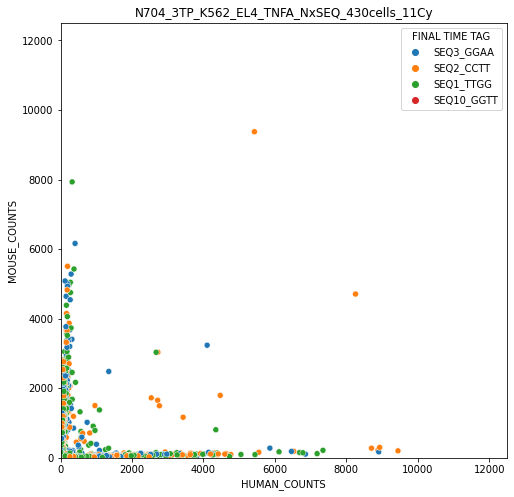

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=highConfidence, 
                x="HUMAN_COUNTS", 
                y="MOUSE_COUNTS",
                hue = 'FINAL TIME TAG'
               ).set_title(SampleName)
ax.set_xlim(0, 12500)
ax.set_ylim(0, 12500)
pdfs.savefig()

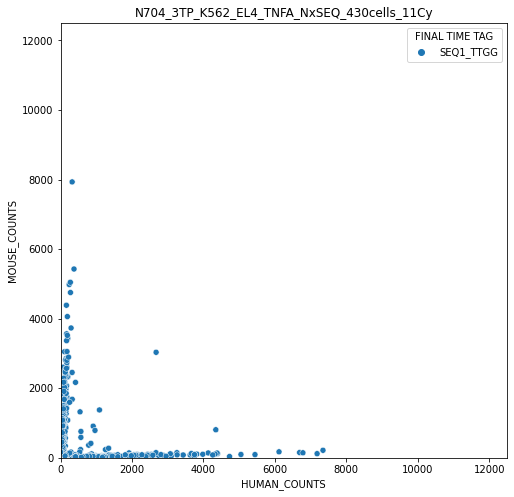

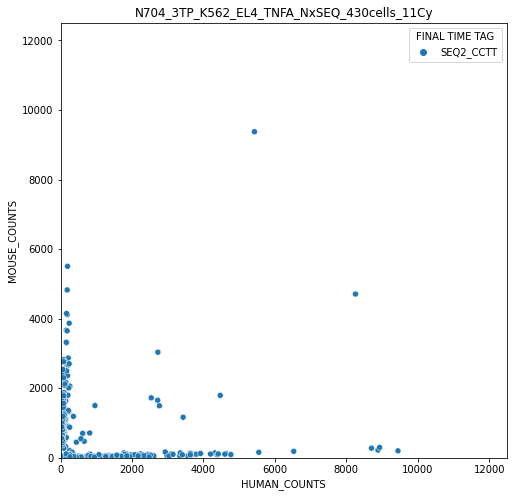

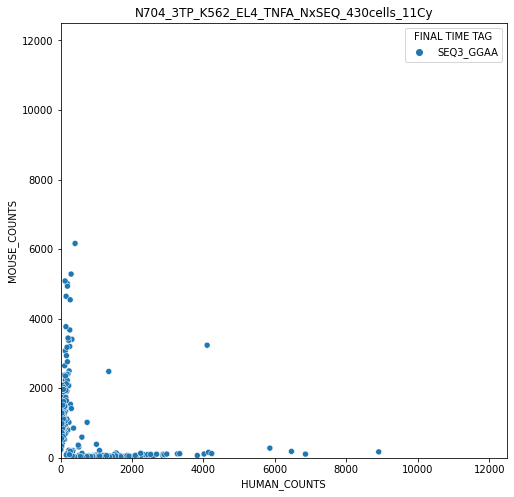

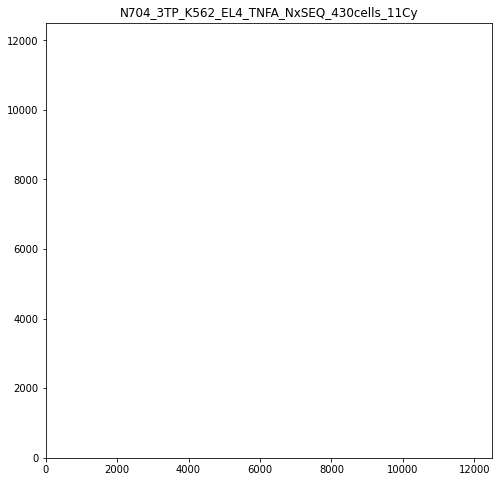

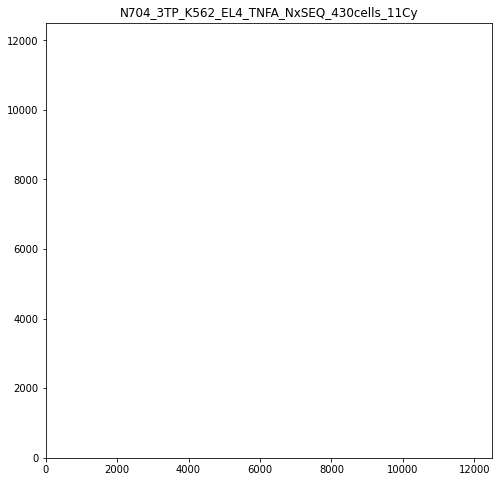

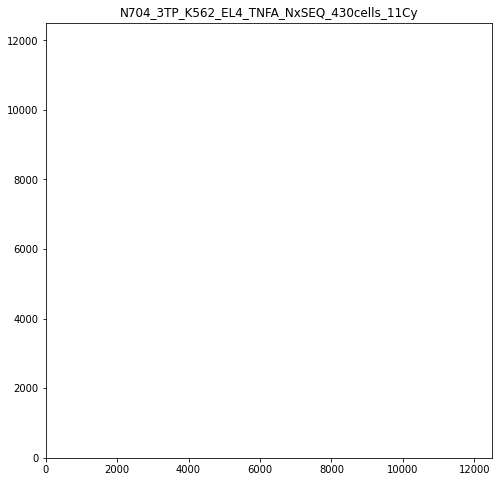

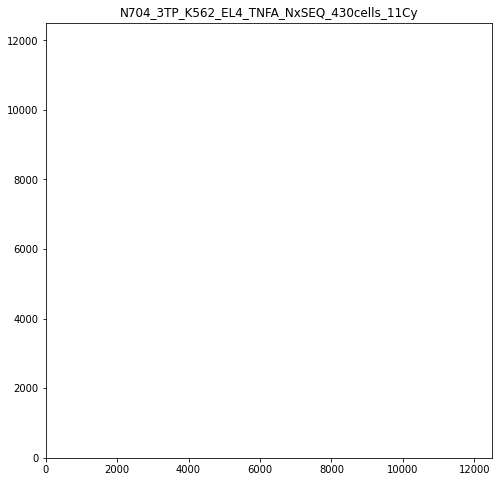

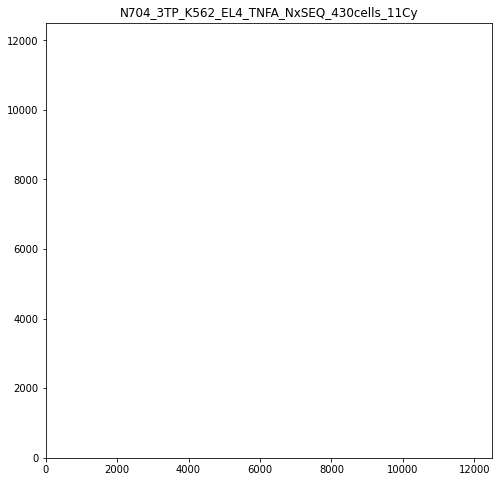

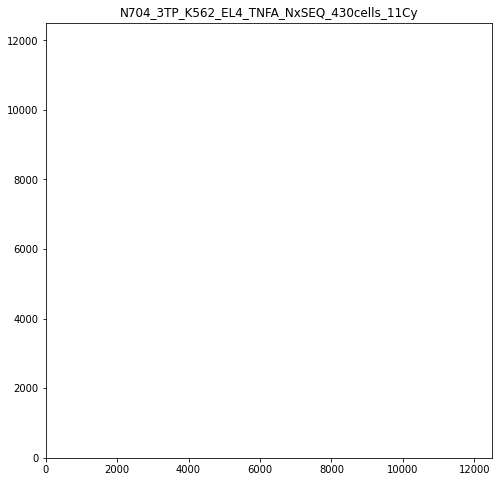

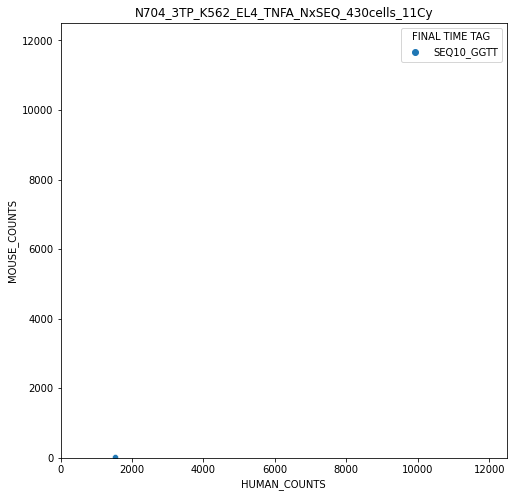

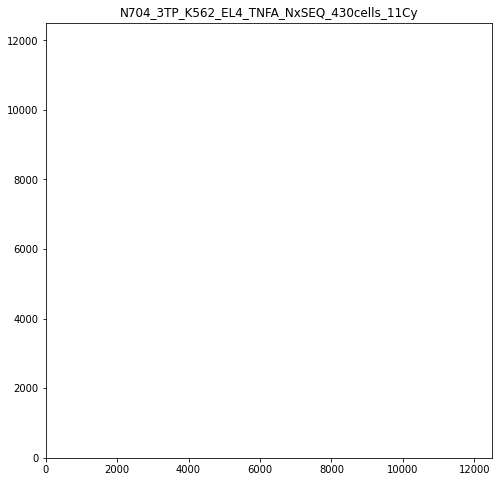

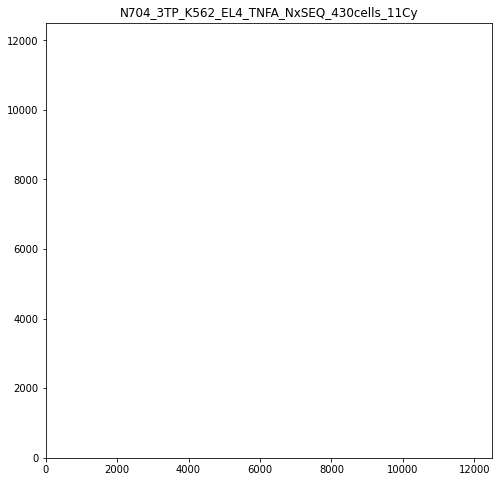

In [15]:
seqnamelist=["SEQ1_","SEQ2","SEQ3","SEQ4","SEQ5","SEQ6","SEQ7","SEQ8","SEQ9","SEQ10","SEQ11","SEQ12"]
for seqname in seqnamelist:
    plotdata=highConfidence[highConfidence["FINAL TIME TAG"].str.contains(seqname)]
    fig, ax = plt.subplots(figsize=(8,8))
    sns.scatterplot(data=plotdata, 
                    x="HUMAN_COUNTS", 
                    y="MOUSE_COUNTS",
                    hue = 'FINAL TIME TAG'


                   ).set_title(SampleName)
    ax.set_xlim(0, 12500)
    ax.set_ylim(0, 12500)
    plt.savefig(seqname+'.svg', format='svg')
    pdfs.savefig()
pdfs.close()

In [16]:
highHuman=highConfidence[(highConfidence.MOUSE_COUNTS/highConfidence.HUMAN_COUNTS)<0.1]

(0.0, 6000.0)

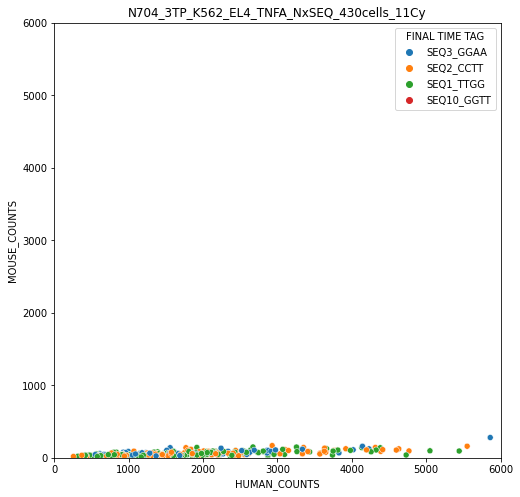

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=highHuman, 
                x="HUMAN_COUNTS", 
                y="MOUSE_COUNTS",
                hue = 'FINAL TIME TAG'
               ).set_title(SampleName)
ax.set_xlim(0, 6000)
ax.set_ylim(0, 6000)